# Image Classification and Reverse Image Search 

# Importing libs

In [133]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tqdm import tqdm_notebook
import scipy
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import math
from sklearn.neighbors import NearestNeighbors
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
import matplotlib.image as mpimg
from sklearn.decomposition import PCA

%matplotlib inline
# tf.compat.v1.disable_eager_execution()

# Train CNN With Cifr-10 dataset

In [33]:
def trainModel():    
    TRAINING_DIR = "Dataset/train"
    training_datagen = ImageDataGenerator(1./255)

    VALIDATION_DIR = "Dataset/test"
    validation_datagen = ImageDataGenerator(1./255)

    train_generator = training_datagen.flow_from_directory(
        TRAINING_DIR,
        target_size=(32,32),
        class_mode='categorical',
      batch_size=256
    )

    validation_generator = validation_datagen.flow_from_directory(
        VALIDATION_DIR,
        target_size=(32,32),
        class_mode='categorical',
      batch_size=256
    )
    

    model = tf.keras.models.Sequential([
        # Note the input shape is the desired size of the image 150x150 with 3 bytes color
        # This is the first convolution
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3), padding='same'),
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
        tf.keras.layers.Dropout(0.25),
        # The second convolution
        tf.keras.layers.Conv2D(64, (3,3), activation='relu',padding='same'),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
        tf.keras.layers.Dropout(0.25),
        # The third convolution,
        tf.keras.layers.Conv2D(64, (3,3), activation='relu',padding='same'),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
        tf.keras.layers.Dropout(0.25),
#         # The fourth convolution
#         # Flatten the results to feed into a DNN
        tf.keras.layers.Flatten(),
        # 512 neuron hidden layer
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='softmax')
    ])


    model.summary()
    model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

    history = model.fit(train_generator, epochs=50, validation_data = validation_generator, verbose = 1, validation_steps=3)
    return model

Training Model with Cifar-10 dataset

In [118]:
trained_model = trainModel()  

Found 50000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 13, 13, 64)        36928     
________________________________

c:\users\knavi\anaconda3\envs\tensorflow-gpu\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/50
196/196 [==============================] - 100s 504ms/step - loss: 3.9195 - accuracy: 0.1022 - val_loss: 2.2997 - val_accuracy: 0.1302
Epoch 2/50
196/196 [==============================] - 100s 508ms/step - loss: 2.2597 - accuracy: 0.1407 - val_loss: 1.8657 - val_accuracy: 0.3320
Epoch 3/50
196/196 [==============================] - 95s 483ms/step - loss: 1.8671 - accuracy: 0.3090 - val_loss: 1.6511 - val_accuracy: 0.3919
Epoch 4/50
196/196 [==============================] - 99s 507ms/step - loss: 1.6388 - accuracy: 0.3990 - val_loss: 1.3872 - val_accuracy: 0.5286
Epoch 5/50
196/196 [==============================] - 93s 473ms/step - loss: 1.4853 - accuracy: 0.4666 - val_loss: 1.2926 - val_accuracy: 0.5234
Epoch 6/50
196/196 [==============================] - 93s 473ms/step - loss: 1.3739 - accuracy: 0.5074 - val_loss: 1.2276 - val_accuracy: 0.5729
Epoch 7/50
196/196 [==============================] - 99s 507ms/step - loss: 1.2842 - accuracy: 0.5448 - val_loss: 1.1572 - val_

# Getting Features

In [232]:
VALIDATION_DIR = "Dataset/test"
validation_datagen = ImageDataGenerator(1./255)
validation_generator = validation_datagen.flow_from_directory(
        VALIDATION_DIR,
        target_size=(32,32),
        class_mode='categorical',
      batch_size=256
    )
TRAINING_DIR = "Dataset/train"
training_datagen = ImageDataGenerator(1./255)
train_generator = training_datagen.flow_from_directory(
        TRAINING_DIR,
        target_size=(32,32),
        class_mode='categorical',
      batch_size=256
    )
features = trained_model.predict_generator(validation_generator, 40,verbose = 1)

Found 10000 images belonging to 10 classes.
Found 50000 images belonging to 10 classes.


c:\users\knavi\anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\keras\engine\training.py:1937: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '
c:\users\knavi\anaconda3\envs\tensorflow-gpu\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


40/40 [==============================] - 4s 103ms/step


In [233]:
print("Shape of feature_list = ", features.shape)

Shape of feature_list =  (10000, 10)


# Prediction for Image Classification
### It predicts frog with highest 9.13

In [255]:
img = image.load_img('C:/Users/knavi/5_frog.png', target_size=(32, 32))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
''
images = np.vstack([x])
classes = trained_model.predict(images)
print(classes)

[[6.5122906e-05 1.6444385e-05 2.0771313e-02 3.1185806e-02 2.7081316e-02
  6.7391889e-03 9.1372824e-01 3.2048076e-04 1.3956360e-06 9.0738722e-05]]


## Using NearestNeighbors Algorithm for Reverse Image Search

In [235]:
filenames = [TRAINING_DIR + '/' + s for s in train_generator.filenames]

In [236]:
neighbors = NearestNeighbors(n_neighbors=5,
                             algorithm='ball_tree',
                             metric='euclidean')
neighbors.fit(features)

NearestNeighbors(algorithm='ball_tree', metric='euclidean')

## Preprocessing input image to fit into our model size format

In [237]:
img_path = 'C:/Users/knavi/417_airplane.png'
input_shape = (32, 32, 3)
img = image.load_img(img_path, target_size=(input_shape[0], input_shape[1]))
img_array = image.img_to_array(img)
expanded_img_array = np.expand_dims(img_array, axis=0)
preprocessed_img = preprocess_input(expanded_img_array)

In [238]:
test_img_features = trained_model.predict(preprocessed_img, batch_size=1)

_, indices = neighbors.kneighbors(test_img_features)

## Getting predictions for similar images

In [239]:
def similar_images(indices):
    plt.figure(figsize=(15,10), facecolor='white')
    plotnumber = 1    
    for index in indices:
        if plotnumber<=len(indices) :
            ax = plt.subplot(2,4,plotnumber)
            plt.imshow(mpimg.imread(filenames[index]), interpolation='lanczos')            
            plotnumber+=1
    plt.tight_layout()

print(indices.shape)


(1, 5)


## Using PCA to reduce the features

In [240]:
pca = PCA(n_components=5)
pca.fit(features)
compressed_features = pca.transform(features)

In [241]:
neighbors_pca_features = NearestNeighbors(n_neighbors=5,
                             algorithm='ball_tree',
                             metric='euclidean').fit(compressed_features)

# It shows 5 images similar images correctly

(1, 5)


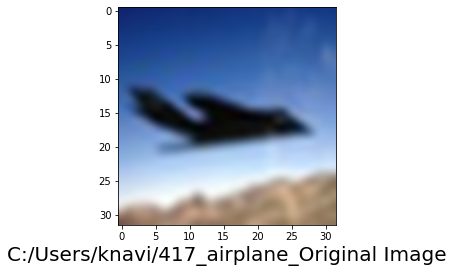

********* Predictions  after PCA ***********


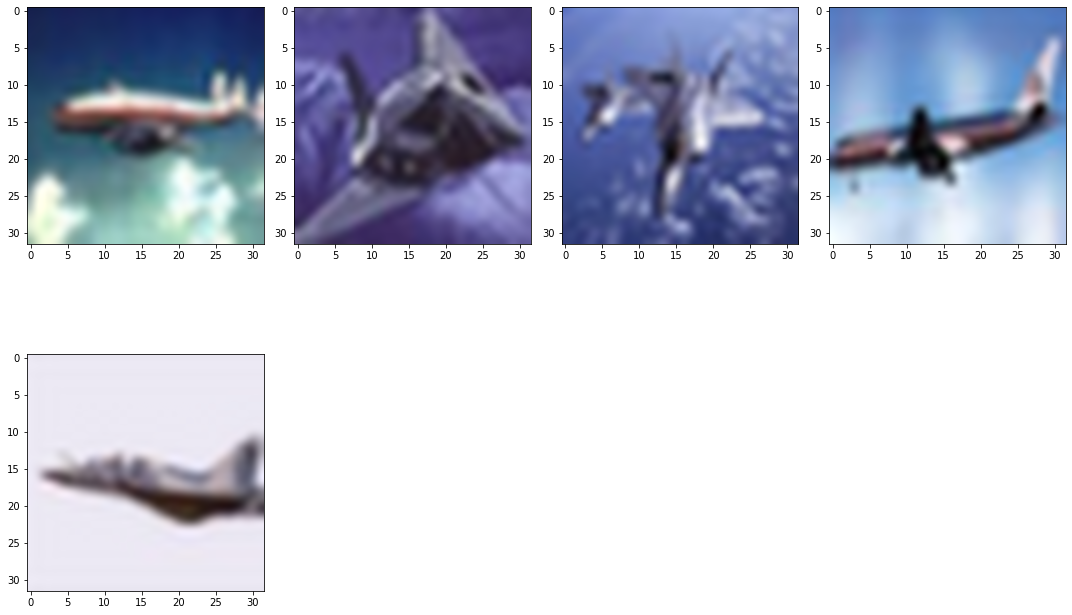

In [242]:
test_img_compressed = pca.transform(test_img_features)
distances, indices = neighbors_pca_features.kneighbors(test_img_compressed)
print(indices.shape)
plt.imshow(mpimg.imread(img_path), interpolation='lanczos')
plt.xlabel(img_path.split('.')[0] + '_Original Image',fontsize=20)
plt.show()
print('********* Predictions  after PCA ***********')
similar_images(indices[0])